<a href="https://colab.research.google.com/github/Adarsh-N123/IIIT_RAIPUR-DATASCIENCE_HACKATHON_TAXIFARE_PREDICTION/blob/main/IIITNAYARAIPUR_HACKATHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("train.csv")
df1 = pd.read_csv("test.csv")

In [ ]:
df.corr()

,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
trip_distance,1.000000,0.273355,-0.060372,0.829692,-0.016118,-0.270702,0.455714,0.432261,-0.000183,0.816478,-0.094002,-0.092665,NaN,-0.035207,-0.007886,-0.001131,-0.023668,-0.003486,0.001392
rate_code,0.273355,1.000000,-0.002726,0.543670,-0.080895,-0.692998,0.268014,0.318800,-0.049447,0.531029,0.005835,-0.003110,NaN,0.017861,0.007309,0.015818,-0.033840,-0.004011,-0.011716
payment_type,-0.060372,-0.002726,1.000000,-0.066491,0.006365,0.001486,-0.491274,-0.086443,0.004975,-0.179079,0.001166,-0.002771,NaN,0.007847,0.029884,0.071458,-0.039133,-0.008933,-0.040477
fare_amount,0.829692,0.543670,-0.066491,1.000000,-0.057712,-0.461236,0.516761,0.430221,-0.026675,0.958428,-0.059885,-0.065842,NaN,-0.000127,0.006167,-0.012430,-0.020998,-0.004027,-0.004883
extra,-0.016118,-0.080895,0.006365,-0.057712,1.000000,0.047640,-0.018170,-0.065128,0.007239,-0.039287,-0.009397,-0.022558,NaN,-0.003911,-0.006703,-0.106173,0.320355,0.004950,0.004083
mta_tax,-0.270702,-0.692998,0.001486,-0.461236,0.047640,1.000000,-0.273454,-0.448595,0.048335,-0.492964,-0.017613,0.151476,NaN,0.001563,-0.008550,-0.011898,0.045090,0.008558,0.001764
tip_amount,0.455714,0.268014,-0.491274,0.516761,-0.018170,-0.273454,1.000000,0.399708,-0.002809,0.695904,-0.029003,-0.025302,NaN,-0.026451,-0.010239,-0.048319,0.008729,0.000827,0.021426
tolls_amount,0.432261,0.318800,-0.086443,0.430221,-0.065128,-0.448595,0.399708,1.000000,0.005692,0.602555,-0.014116,-0.035023,NaN,-0.016343,0.003878,-0.049999,-0.027309,0.004057,0.000835
imp_surcharge,-0.000183,-0.049447,0.004975,-0.026675,0.007239,0.048335,-0.002809,0.005692,1.000000,-0.019369,-0.002914,-0.007065,NaN,-0.004881,0.005432,-0.008182,0.003125,0.000756,-0.008944
total_amount,0.816478,0.531029,-0.179079,0.958428,-0.039287,-0.492964,0.695904,0.602555,-0.019369,1.000000,-0.055183,-0.062446,NaN,-0.009185,0.002919,-0.032199,-0.012291,-0.001971,0.001413


In [ ]:
df

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,22.43,1,N,1,59.5,0.5,0.5,10.00,5.76,0.3,76.56,132,259,2018,5,23,2,23,2998.0,29.76
34996,9.16,1,N,1,30.0,0.0,0.5,6.58,5.76,0.3,43.14,24,138,2018,4,4,2,9,1419.0,29.15
34997,6.78,1,N,1,23.0,0.0,0.5,5.95,0.00,0.3,29.75,140,231,2018,3,7,2,8,2459.0,42.67
34998,0.26,1,N,2,3.0,0.0,0.5,0.00,0.00,0.3,3.80,142,142,2018,4,18,2,8,1932.0,26.73


In [ ]:
# def remove_outlier(df_in, i):
  
#       q1 = df_in[i].quantile(0.001)
#       q3 = df_in[i].quantile(0.999)
#       iqr = q3-q1 #Interquartile range
#       fence_low  = q1-1.5*iqr
#       fence_high = q3+1.5*iqr
#       df_out = df_in.loc[(df_in[i] > fence_low) & (df_in[i] < fence_high)]
#       return df_out


In [ ]:
df = remove_outlier(df,"calculated_total_amount")

# ["trip_distance","rate_code","fare_amount","extra","mta_tax","tip_amount","tolls_amount","imp_surcharge"]

In [ ]:
df["store_and_fwd_flag"].value_counts()

N    34823
Y      177
Name: store_and_fwd_flag, dtype: int64

In [ ]:
df["payment_type"].value_counts()

1    30899
2     3926
3      132
4       43
Name: payment_type, dtype: int64

In [ ]:
df["rate_code"].value_counts()

1    33664
3      650
5      501
4      182
2        3
Name: rate_code, dtype: int64

In [ ]:
df["year"].value_counts()

2018    35000
Name: year, dtype: int64

In [ ]:
df = df.drop("year",axis=1)
df1 = df1.drop("year",axis=1)
# df1 = df1.drop("store")

In [ ]:
df.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,8,20,0,21,1575.0,23.80


In [ ]:
df.isnull().sum()

trip_distance              0
rate_code                  0
store_and_fwd_flag         0
payment_type               0
fare_amount                0
extra                      0
mta_tax                    0
tip_amount                 0
tolls_amount               0
imp_surcharge              0
total_amount               0
pickup_location_id         0
dropoff_location_id        0
month                      0
day                        0
day_of_week                0
hour_of_day                0
trip_duration              0
calculated_total_amount    0
dtype: int64

In [ ]:
# sns.boxplot(x=df["hour_of_day"],y=df["calculated_total_amount"])

In [ ]:
df.corr()

,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
trip_distance,1.000000,0.273355,-0.060372,0.829692,-0.016118,-0.270702,0.455714,0.432261,-0.000183,0.816478,-0.094002,-0.092665,-0.035207,-0.007886,-0.001131,-0.023668,-0.003486,0.001392
rate_code,0.273355,1.000000,-0.002726,0.543670,-0.080895,-0.692998,0.268014,0.318800,-0.049447,0.531029,0.005835,-0.003110,0.017861,0.007309,0.015818,-0.033840,-0.004011,-0.011716
payment_type,-0.060372,-0.002726,1.000000,-0.066491,0.006365,0.001486,-0.491274,-0.086443,0.004975,-0.179079,0.001166,-0.002771,0.007847,0.029884,0.071458,-0.039133,-0.008933,-0.040477
fare_amount,0.829692,0.543670,-0.066491,1.000000,-0.057712,-0.461236,0.516761,0.430221,-0.026675,0.958428,-0.059885,-0.065842,-0.000127,0.006167,-0.012430,-0.020998,-0.004027,-0.004883
extra,-0.016118,-0.080895,0.006365,-0.057712,1.000000,0.047640,-0.018170,-0.065128,0.007239,-0.039287,-0.009397,-0.022558,-0.003911,-0.006703,-0.106173,0.320355,0.004950,0.004083
mta_tax,-0.270702,-0.692998,0.001486,-0.461236,0.047640,1.000000,-0.273454,-0.448595,0.048335,-0.492964,-0.017613,0.151476,0.001563,-0.008550,-0.011898,0.045090,0.008558,0.001764
tip_amount,0.455714,0.268014,-0.491274,0.516761,-0.018170,-0.273454,1.000000,0.399708,-0.002809,0.695904,-0.029003,-0.025302,-0.026451,-0.010239,-0.048319,0.008729,0.000827,0.021426
tolls_amount,0.432261,0.318800,-0.086443,0.430221,-0.065128,-0.448595,0.399708,1.000000,0.005692,0.602555,-0.014116,-0.035023,-0.016343,0.003878,-0.049999,-0.027309,0.004057,0.000835
imp_surcharge,-0.000183,-0.049447,0.004975,-0.026675,0.007239,0.048335,-0.002809,0.005692,1.000000,-0.019369,-0.002914,-0.007065,-0.004881,0.005432,-0.008182,0.003125,0.000756,-0.008944
total_amount,0.816478,0.531029,-0.179079,0.958428,-0.039287,-0.492964,0.695904,0.602555,-0.019369,1.000000,-0.055183,-0.062446,-0.009185,0.002919,-0.032199,-0.012291,-0.001971,0.001413


In [ ]:
df.describe()

,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
count,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.00000,35000.000000
mean,9.088815,1.110086,1.123400,31.920911,0.320337,0.486929,6.142190,2.262871,0.299940,41.442469,152.543943,146.852200,6.132429,15.337743,2.885200,13.803657,2257.38360,41.324249
std,4.496854,0.581456,0.350842,14.689516,0.402590,0.079781,4.397599,3.578315,0.004242,19.241543,59.764598,76.373292,3.342088,8.691250,1.926999,6.224485,5112.41526,19.167043
min,0.010000,1.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.310000
25%,6.470000,1.000000,1.000000,24.000000,0.000000,0.500000,4.460000,0.000000,0.300000,30.350000,132.000000,87.000000,3.000000,7.000000,1.000000,10.000000,1448.00000,30.300000
50%,8.700000,1.000000,1.000000,29.000000,0.000000,0.500000,6.050000,0.000000,0.300000,38.470000,138.000000,141.000000,6.000000,16.000000,3.000000,14.000000,1862.00000,38.460000
75%,10.990000,1.000000,1.000000,36.000000,0.500000,0.500000,8.100000,5.760000,0.300000,48.352500,186.000000,229.000000,9.000000,23.000000,4.000000,19.000000,2340.00000,48.200000
max,79.010000,5.000000,4.000000,400.000000,18.500000,0.500000,215.000000,189.500000,0.300000,468.350000,265.000000,265.000000,12.000000,31.000000,6.000000,23.000000,86347.00000,468.350000


In [ ]:
df = df.drop(["month","day","day_of_week","hour_of_day"],axis=1)
df1 = df1.drop(["month","day","day_of_week","hour_of_day"],axis=1)

In [ ]:
df.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,1575.0,23.80


In [ ]:
df["mta_tax"].value_counts()

0.5    34085
0.0      915
Name: mta_tax, dtype: int64

In [ ]:
df["extra"].value_counts()

df = df[df["extra"]!=17.5]

In [ ]:
df = df[df["extra"]!=1.5]
df = df[df["extra"]!=18.5]
df = df[df["extra"]!=0.8]
df["extra"].value_counts()


0.0    18139
0.5    11401
1.0     5454
Name: extra, dtype: int64

In [ ]:
df["imp_surcharge"].value_counts()
df = df.drop("imp_surcharge",axis=1)
df1 = df1.drop("imp_surcharge",axis=1)

In [ ]:
df.head()
df = df.drop(["pickup_location_id","dropoff_location_id"],axis=1)
df1 = df1.drop(["pickup_location_id","dropoff_location_id"],axis=1)

In [ ]:
df.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,40.70,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,4.55,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,57.67,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,46.31,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,27.36,1575.0,23.80


In [ ]:
# df1 = df[["rate_code","store_and_fwd_flag","payment_type","extra","mta_tax"]]
# df = df.drop(["rate_code","store_and_fwd_flag","payment_type","extra","mta_tax"],axis=1)
df.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,40.70,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,4.55,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,57.67,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,46.31,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,27.36,1575.0,23.80


In [ ]:
# df1.head()

In [ ]:
# df2 = df["calculated_total_amount"]
# df = df.drop("calculated_total_amount",axis=1)

In [ ]:
# df2.head()

In [ ]:
df.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,40.70,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,4.55,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,57.67,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,46.31,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,27.36,1575.0,23.80


In [ ]:
from sklearn.preprocessing import MinMaxScaler

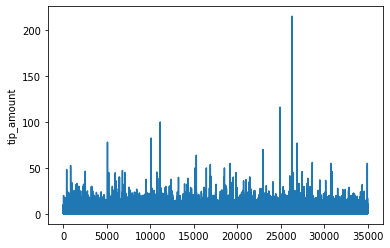

In [ ]:
L=[]
for i in range(len(df)):
  L.append(i)
sns.lineplot(x=L,y = df["tip_amount"])

In [ ]:
df = df[df["tip_amount"]<=50]
# df["tip_amount"].mean()

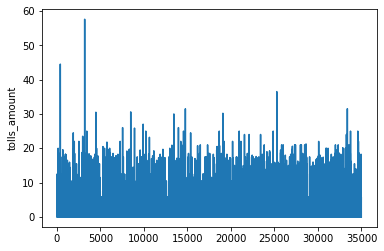

In [ ]:
L=[]
for i in range(len(df)):
  L.append(i)
sns.lineplot(x=L,y = df["tolls_amount"])

In [ ]:
df['store_and_fwd_flag'].replace(['N','Y'],
                        [0, 1], inplace=True)

df1['store_and_fwd_flag'].replace(['N','Y'],
                        [0, 1], inplace=True)
# df = df.drop("store_and_fwd_flag",axis=1)

In [ ]:
df.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,trip_duration,calculated_total_amount
0,9.01,1,0,1,26.0,0.0,0.5,8.14,5.76,40.70,2131.0,24.30
1,0.20,1,0,1,3.0,0.0,0.5,0.75,0.00,4.55,2377.0,37.40
2,9.65,1,0,1,41.5,0.0,0.5,9.61,5.76,57.67,1286.0,30.36
3,9.50,1,0,1,30.0,0.5,0.5,9.25,5.76,46.31,2586.0,4.30
4,5.80,1,0,1,21.5,0.5,0.5,4.56,0.00,27.36,1575.0,23.80


In [ ]:
# df['mta_tax'].replace([0.0,0.5],
#                         [0, 1], inplace=True)
# df1['mta_tax'].replace([0.0,0.5],
#                         [0, 1], inplace=True)

In [ ]:
df 

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,trip_duration,calculated_total_amount
0,9.01,1,0,1,26.0,0.0,0.5,8.14,5.76,40.70,2131.0,24.30
1,0.20,1,0,1,3.0,0.0,0.5,0.75,0.00,4.55,2377.0,37.40
2,9.65,1,0,1,41.5,0.0,0.5,9.61,5.76,57.67,1286.0,30.36
3,9.50,1,0,1,30.0,0.5,0.5,9.25,5.76,46.31,2586.0,4.30
4,5.80,1,0,1,21.5,0.5,0.5,4.56,0.00,27.36,1575.0,23.80
...,...,...,...,...,...,...,...,...,...,...,...,...
34995,22.43,1,0,1,59.5,0.5,0.5,10.00,5.76,76.56,2998.0,29.76
34996,9.16,1,0,1,30.0,0.0,0.5,6.58,5.76,43.14,1419.0,29.15
34997,6.78,1,0,1,23.0,0.0,0.5,5.95,0.00,29.75,2459.0,42.67
34998,0.26,1,0,2,3.0,0.0,0.5,0.00,0.00,3.80,1932.0,26.73


In [ ]:
df["extra"].value_counts()

0.0    18131
0.5    11396
1.0     5453
Name: extra, dtype: int64

In [ ]:
# df['extra'].replace([0.0,0.5,1.0],
                        # [0, 1, 2], inplace=True)

In [ ]:
df = df.drop(["store_and_fwd_flag","fare_amount","mta_tax"],axis=1)

In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE

In [ ]:
y_train = df["calculated_total_amount"]
x_train = df.drop("calculated_total_amount",axis=1)
# y_test = df1["calculated_total_amount"]
x_test = df1
x_test = x_test.drop(["store_and_fwd_flag","fare_amount","mta_tax"],axis=1)

In [ ]:
# oversample = SMOTE()
# x_train, y_train = oversample.fit_resample(x_train, y_train)

In [ ]:
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x_train,y_train, test_size=0.05, random_state=42)
# print(len(x_train))
# x_train1 = x_train;
# y_train1 = y_train;
# x_train = x_train.append(x_train1)
# y_train = y_train.append(y_train1)
# x_train = x_train.append(x_train1)
# y_train = y_train.append(y_train1)
# print(len(x_train))
# df1.head()
# from sklearn.decomposition import PCA
# pca = PCA()
# x_train = pca.fit_transform(x_train)
# x_test = pca.transform(x_test)
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures()
# x_train = poly.fit_transform(x_train)
# x_test = poly.transform(x_test)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# scaler = MinMaxScaler()
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
import tensorflow as tf
from tensorflow import keras

!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb

In [ ]:
# dtrain = xgb.DMatrix(x_train, label=y_train)
# dvalid = xgb.DMatrix(x_test, label=y_test)
# dtest = xgb.DMatrix(x_test)
# watchlist = [(dtrain, 'train'),(dvalid,'test')]

# xgb_params = {
#     'min_child_weight': 1, 
#     'learning_rate': 0.01, 
#     'colsample_bytree': 0.7, 
#     'max_depth': 10,
#     'subsample': 0.7,
#     'n_estimators': 10000,
#     'n_jobs': -1, 
#     'booster' : 'gbtree', 
#     'silent': 1,
#     'eval_metric': 'rmse'}

# model = xgb.train(xgb_params, dtrain, 800, watchlist, early_stopping_rounds=100, maximize=False, verbose_eval=50)

In [ ]:
# y_pred = model.predict(dtest)
# y_pred

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import lightgbm as lgb
# # model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
# # model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
# #           verbose=20,eval_metric='rmse')
# params = {
#     'task': 'train', 
#     'boosting': 'gbdt',
#     'objective': 'regression',
#     'num_leaves': 10,
#     'learning_rate': 0.05,
#     'metric': {"rmse"},
#     'verbose': -1
# }
# lgb_train = lgb.Dataset(x_train, y_train)
# lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)
# model = lgb.train(params,
#                  train_set=lgb_train,
#                  valid_sets=lgb_eval,
#                  early_stopping_rounds=100)
# # valid_sets=lgb_eval,
# y_pred = model.predict(x_test1)

# # accuracy check
# # mse = mean_squared_error(y_test, y_pred)
# # rmse = mse**(0.5)
# # print("MSE: %.2f" % mse)
# # print("RMSE: %.2f" % rmse) 

In [ ]:
# from keras import backend as K
# # , activation='selu'
# from keras.optimizers import Adam,Nadam
# normalizer = tf.keras.layers.Normalization(axis=-1)
# def root_mean_squared_error(y_true, y_pred):
#         return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 
# model = keras.Sequential([
#     normalizer,
#     keras.layers.Dense(160, kernel_initializer='normal', activation='relu'),
#     keras.layers.Dropout(0.2),
    
#     keras.layers.Dense(480, kernel_initializer='normal', activation='relu'),
#     keras.layers.Dropout(0.2),
    
#     keras.layers.Dense(256, kernel_initializer='normal', activation='relu' ),
    
    
    
#     keras.layers.Dense(1, kernel_initializer='normal', activation='linear'),
# ])
# model.compile(
#     loss="mean_squared_error",
#     optimizer = Nadam(learning_rate = 0.1),
#     metrics=[tf.keras.metrics.RootMeanSquaredError()]
# )
# model.fit(x_train,y_train,epochs=10)







In [ ]:
# model.evaluate(x_test,y_test)
# model.evaluate(x_train,y_train)
# test_pred = model.predict(x_test)


In [ ]:
# predictions

In [ ]:
from sklearn.linear_model import LinearRegression
train_rmse_errors = []
test_rmse_errors = []
for d in range(1,3):
  poly_conv = PolynomialFeatures(degree=d,include_bias=False)
  x_train1 = poly_conv.fit_transform(x_train)
  x_test1 = poly_conv.transform(x_test)

  # x_train2,x_test2,y_train2,y_test2=train_test_split(poly_fea,dfpolyy,test_size=0.3,random_state=101)
  # model = LinearRegression()
  from sklearn.linear_model import Lasso
  model = Lasso(alpha=0.01)
  model.fit(x_train1,y_train)
  train_pred = model.predict(x_train1)
  test_pred = model.predict(x_test1)
  rmse1 = np.sqrt(mean_squared_error(y_train,train_pred))
  # rmse2 = np.sqrt(mean_squared_error(y_test,test_pred))
  train_rmse_errors.append(rmse1)
  # test_rmse_errors.append(rmse2)



In [ ]:
test_rmse_errors

[]

In [ ]:
# plt.plot(range(1,3),train_rmse_errors,label="Train")
# plt.plot(range(1,3),test_rmse_errors,label="Test")
# plt.ylabel("RMSE")
# plt.xlabel("Degree")
# plt.legend()

In [ ]:
df10 = df1[["trip_distance","rate_code"]]

In [ ]:
df10.head()

,trip_distance,rate_code
0,15.70,1
1,7.30,1
2,14.87,1
3,2.90,1
4,8.96,1


In [ ]:
df10["calculated_total_amount"]= test_pred
df10.shape
test_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([39.98415667, 41.88779664, 41.77898662, ..., 41.75176034,
       41.84474562, 41.83565203])

In [ ]:
df10.head()
df10["calculated_total_amount"].unique()

array([39.98415667, 41.88779664, 41.77898662, ..., 41.75176034,
       41.84474562, 41.83565203])

In [ ]:
df10=df10.drop(["trip_distance","rate_code"],axis=1)

In [ ]:
df10.head()

,calculated_total_amount
0,39.984157
1,41.887797
2,41.778987
3,39.173028
4,40.694239


In [ ]:
df10

,calculated_total_amount
0,39.984157
1,41.887797
2,41.778987
3,39.173028
4,40.694239
...,...
14995,41.381587
14996,41.843096
14997,41.751760
14998,41.844746


In [ ]:
df10.to_csv('finalfile1234567890.csv', index=False)

In [ ]:
df100 = pd.read_csv("finalfile1234567890.csv")

In [ ]:
df100["calculated_total_amount"].value_counts()

39.984157    1
42.009479    1
41.832114    1
42.024687    1
39.467870    1
            ..
41.921431    1
41.784805    1
39.344600    1
41.639408    1
41.835652    1
Name: calculated_total_amount, Length: 15000, dtype: int64

In [ ]:
df1["extra"].value_counts()

0.00     7743
0.50     4921
1.00     2331
1.50        2
0.11        1
18.00       1
17.50       1
Name: extra, dtype: int64

In [ ]:
df100.head()

,calculated_total_amount
0,39.984157
1,41.887797
2,41.778987
3,39.173028
4,40.694239
